In [127]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [128]:
# read first n rows and columns
filename = 'GarmonData.csv'

df = pd.read_csv(filename, skiprows=0, usecols = ['DATEUTC','ID','LAT','LON','TEMPC','SOLARRADIATION','UV','WINDSPEEDKMH','WINDDIR','RAININ'])

In [129]:
df_pruned = df.drop_duplicates('ID')
print(df_pruned)
print(df_pruned[0:1])
# print(df_pruned.dtypes)
# print(df_pruned.index[0])

                     DATEUTC         ID        LAT       LON  TEMPC  WINDDIR  \
0        2019-06-20 18:50:00  GARMON002  50.846792  4.755860   19.7      NaN   
63102    2019-06-21 10:35:00  GARMON004  50.870755  4.685430   22.4      NaN   
124098   2019-06-24 12:45:00  GARMON005  50.881346  4.712534   25.6      NaN   
179994   2019-06-22 07:40:00  GARMON006  50.912292  4.715563   15.8      NaN   
238472   2019-06-22 09:05:00  GARMON007  50.869166  4.704765   24.5      NaN   
...                      ...        ...        ...       ...    ...      ...   
3432659  2019-10-21 12:35:00  GARMON094  50.881952  4.702507   13.7    101.0   
3462696  2020-01-16 12:25:00  GARMON096  50.885465  4.677504   16.6    264.0   
3464375  2019-10-21 12:35:00  GARMON097  50.866657  4.710121   13.5     77.0   
3494166  2019-10-21 12:35:00  GARMON098  50.882074  4.702959   13.7    101.0   
3524203  2019-10-31 12:20:00  GARMON099  50.881479  4.714405   19.7    185.0   

         WINDSPEEDKMH  RAININ  SOLARRAD

In [130]:
lat_min = np.min(df['LAT'])
lat_max = np.max(df['LAT'])
lon_min = np.min(df['LON'])
lon_max = np.max(df['LON'])
print('lat: '+str(lat_min)+' - '+str(lat_max))
print('lon: '+str(lon_min)+' - '+str(lon_max))

lat: 50.846792 - 50.937804
lon: 4.654269 - 4.789127


In [139]:
lat_star = 50.861075 #50.884406
lon_star = 4.765927 #4.693768
date_star = '2019-12-26' 
quantity = 'WINDDIR'
ith_closest = 0 # 0-4 choose one of the 5 closest

In [140]:
dists = (df_pruned['LAT']-lat_star)**2 + (df_pruned['LON']-lon_star)**2
print(dists)
idxs_ = dists.nsmallest(5).index
#idx_star = dists.idxmin() #choose one of the closest instead
idx_star = idxs_[ith_closest]
print(idx_star, idxs_[0])
print(df_pruned.loc[idx_star])

0          0.000305
63102      0.006573
124098     0.003262
179994     0.005160
238472     0.003806
             ...   
3432659    0.004458
3462696    0.008413
3464375    0.003145
3494166    0.004406
3524203    0.003071
Length: 78, dtype: float64
0 0
DATEUTC           2019-06-20 18:50:00
ID                          GARMON002
LAT                           50.8468
LON                           4.75586
TEMPC                            19.7
WINDDIR                           NaN
WINDSPEEDKMH                     1.64
RAININ                              0
SOLARRADIATION                  51.13
UV                                  1
Name: 0, dtype: object


In [141]:
id_star = df_pruned.loc[idx_star]['ID']
print(id_star)

GARMON002


In [142]:
df_id = df[df['ID'] == id_star]

In [143]:
print(df_id)
print(df_id['DATEUTC'])

                   DATEUTC         ID        LAT      LON  TEMPC  WINDDIR  \
0      2019-06-20 18:50:00  GARMON002  50.846792  4.75586   19.7      NaN   
1      2019-06-20 18:55:00  GARMON002  50.846792  4.75586   19.4      NaN   
2      2019-06-20 19:00:00  GARMON002  50.846792  4.75586   19.0      NaN   
3      2019-06-20 19:05:00  GARMON002  50.846792  4.75586   18.6      NaN   
4      2019-06-20 19:10:00  GARMON002  50.846792  4.75586   18.2      NaN   
...                    ...        ...        ...      ...    ...      ...   
63097  2020-02-02 23:35:00  GARMON002  50.846792  4.75586   11.0    212.0   
63098  2020-02-02 23:40:00  GARMON002  50.846792  4.75586   11.0    193.0   
63099  2020-02-02 23:45:00  GARMON002  50.846792  4.75586   11.0    197.0   
63100  2020-02-02 23:50:00  GARMON002  50.846792  4.75586   11.0    196.0   
63101  2020-02-02 23:55:00  GARMON002  50.846792  4.75586   11.0    196.0   

       WINDSPEEDKMH  RAININ  SOLARRADIATION   UV  
0              1.64     

In [144]:
df_date = df_id[df_id['DATEUTC'].str.contains(date_star)]
print(df_date)

                   DATEUTC         ID        LAT      LON  TEMPC  WINDDIR  \
51871  2019-12-26 00:00:00  GARMON002  50.846792  4.75586   -0.8     38.0   
51872  2019-12-26 00:05:00  GARMON002  50.846792  4.75586   -1.0     34.0   
51873  2019-12-26 00:10:00  GARMON002  50.846792  4.75586   -1.0     34.0   
51874  2019-12-26 00:15:00  GARMON002  50.846792  4.75586   -0.9     34.0   
51875  2019-12-26 00:20:00  GARMON002  50.846792  4.75586   -0.9     58.0   
...                    ...        ...        ...      ...    ...      ...   
52154  2019-12-26 23:35:00  GARMON002  50.846792  4.75586    7.4    121.0   
52155  2019-12-26 23:40:00  GARMON002  50.846792  4.75586    7.4     74.0   
52156  2019-12-26 23:45:00  GARMON002  50.846792  4.75586    7.4     90.0   
52157  2019-12-26 23:50:00  GARMON002  50.846792  4.75586    7.3     84.0   
52158  2019-12-26 23:55:00  GARMON002  50.846792  4.75586    7.3    108.0   

       WINDSPEEDKMH    RAININ  SOLARRADIATION   UV  
51871          0.00  0

Text(0.5, 0.98, 'GARMON002')

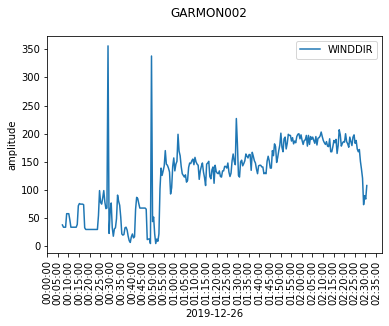

In [145]:
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(df_date[quantity], label=quantity)
ax.legend()
ax.set_xlabel(date_star)
ax.set_ylabel('quantity')
ax.set_xticklabels(df_date['DATEUTC'].str.slice(start=11), rotation='vertical')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
fig.suptitle(id_star)